# Init

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_context('talk', font_scale = 0.8)
sns.set_palette('pastel')

In [3]:
sns.set(style='whitegrid')

In [5]:
dataset = pd.read_csv('/content/dataset1_mrc_table6.csv')
dataset.head(18)

par_pctile  tier  ...  tot_count   density
0          0.0   1.0  ...    52724.0  0.002561
1          0.0   2.0  ...   183973.0  0.002370
2          0.0   3.0  ...   393548.0  0.002272
3          0.0   4.0  ...   134098.0  0.001894
4          0.0   5.0  ...  1944082.0  0.003259
5          0.0   6.0  ...   486852.0  0.003021
6          0.0   7.0  ...   257854.0  0.005705
7          0.0   8.0  ...    55947.0  0.005040
8          0.0   9.0  ...  2021451.0  0.005954
9          0.0  10.0  ...   126025.0  0.008530
10         0.0  11.0  ...    42313.0  0.008484
11         0.0  12.0  ...    10121.0  0.008102
12         0.0  13.0  ...   942344.0  0.010238
13         0.0  14.1  ...  1239448.0  0.013719
14         0.0  14.2  ...  2866578.0  0.019567
15         1.0   1.0  ...    52724.0  0.001536
16         1.0   2.0  ...   183973.0  0.001799
17         1.0   3.0  ...   393548.0  0.002073

[18 rows x 21 columns]

In [6]:
dataset.shape

(1515, 21)

In [7]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1515 entries, 0 to 1514
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   par_pctile       1515 non-null   float64
 1   tier             1515 non-null   float64
 2   tier_name        1515 non-null   object 
 3   par_mean         1511 non-null   float64
 4   k_mean           1511 non-null   float64
 5   k_rank           1511 non-null   float64
 6   k_top1pc         1511 non-null   float64
 7   k_top5pc         1511 non-null   float64
 8   k_top10pc        1511 non-null   float64
 9   k_q5             1511 non-null   float64
 10  k_q4             1511 non-null   float64
 11  k_q3             1511 non-null   float64
 12  k_q2             1511 non-null   float64
 13  k_q1             1511 non-null   float64
 14  k_nowork         1511 non-null   float64
 15  married          1511 non-null   float64
 16  k_median         1511 non-null   float64
 17  k_median_nozer

In [8]:
dataset.isna().sum()

par_pctile          0
tier                0
tier_name           0
par_mean            4
k_mean              4
k_rank              4
k_top1pc            4
k_top5pc            4
k_top10pc           4
k_q5                4
k_q4                4
k_q3                4
k_q2                4
k_q1                4
k_nowork            4
married             4
k_median            4
k_median_nozero    10
count               4
tot_count           4
density             4
dtype: int64

# EDA

In [9]:
df = pd.DataFrame()
df["tier"] = dataset["tier"].unique()
df["tot_count"] = dataset["tot_count"].unique()[:-1]
df.plot.bar(x="tier", y="tot_count")


In [42]:
plt.figure(figsize=(6,6))
sns.set_palette('pastel')
ax = sns.barplot(x = pd.DataFrame(dataset["tier"].unique())[0], 
                 y = pd.DataFrame(dataset['tot_count'].unique()[:-1])[0], 
                 palette="flare_r", log=False)
ax.set(xlabel='Tier Name (Highest → Lowest)', ylabel = 'Count of Children (millions)')
plt.yticks(ax.get_yticks(), ax.get_yticks() /100000)
xs = [int(i+1) for i in ax.get_xticks()[:-2]]
xs.append(14.1)
xs.append(14.2)
plt.xticks(ax.get_xticks(),xs)
plt.title('Count of Children per Tier ', fontsize = 15, fontweight = 'bold')
plt.show()

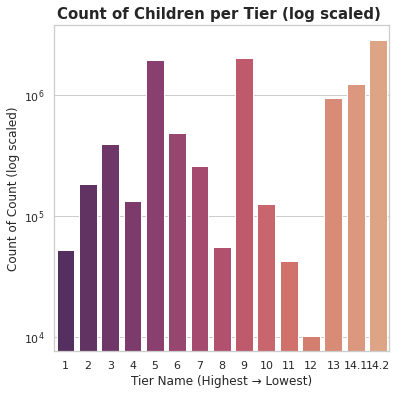

In [44]:
plt.figure(figsize=(6,6))
sns.set_palette('pastel')

ax = sns.barplot(x = pd.DataFrame(dataset["tier"].unique())[0], 
                 y = pd.DataFrame(dataset['tot_count'].unique()[:-1])[0], 
                 palette="flare_r", log=True)
ax.set(xlabel='Tier Name (Highest → Lowest)', ylabel = 'Count of Count (log scaled)')
xs = [int(i+1) for i in ax.get_xticks()[:-2]]
xs.append(14.1)
xs.append(14.2)
plt.xticks(ax.get_xticks(),xs)
plt.title('Count of Children per Tier (log scaled) ', fontsize = 15, fontweight = 'bold')
plt.show()

In [12]:
x = []
for i in range(1,16):
  temp = []
  if i == 14: i = 14.1
  if i == 15: i = 14.2
  temp.append(dataset[dataset["tier"]==i][dataset["par_pctile"] < 50]["density"].to_numpy().sum())
  temp.append(dataset[dataset["tier"]==i][dataset["par_pctile"] >= 50][dataset["par_pctile"] < 90]["density"].to_numpy().sum())
  temp.append(dataset[dataset["tier"]==i][dataset["par_pctile"] >= 90][dataset["par_pctile"] < 99]["density"].to_numpy().sum())
  temp.append(dataset[dataset["tier"]==i][dataset["par_pctile"] >= 99]["density"].to_numpy().sum())
  x.append(temp)
x = pd.DataFrame(x, index = dataset.tier_name.unique(), columns = ["bottom_50", "middle_40", "top_10", "top_1"])
x

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


bottom_50  ...     top_1
Ivy Plus                                        0.134891  ...  0.167286
Other elite schools (public and private)        0.158599  ...  0.111919
Highly selective public                         0.210015  ...  0.026937
Highly selective private                        0.172031  ...  0.078435
Selective public                                0.297621  ...  0.014553
Selective private                               0.274521  ...  0.026156
Nonselective four-year public                   0.482242  ...  0.006527
Nonselective four-year private not-for-profit   0.346131  ...  0.021788
Two-year (public and private not-for-profit)    0.439245  ...  0.004948
Four-year for-profit                            0.560095  ...  0.005126
Two-year for-profit                             0.558977  ...       NaN
Less than two-year schools of any type          0.544116  ...       NaN
Attending college with insufficient data        0.568285  ...  0.006995
Late attender (ages 23-28)                      0.639813  ...  0.001757
Never attended college (before year 2013)       0.720200  ...  0.001495

[15 rows x 4 columns]

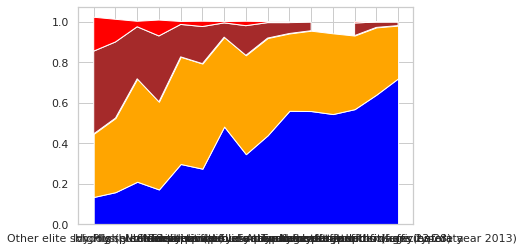

In [13]:
plt.stackplot(x.index, x.bottom_50, x.middle_40, x.top_10, x.top_1,
              baseline ='zero',
              colors =['blue', 'orange', 'brown', 'red'])

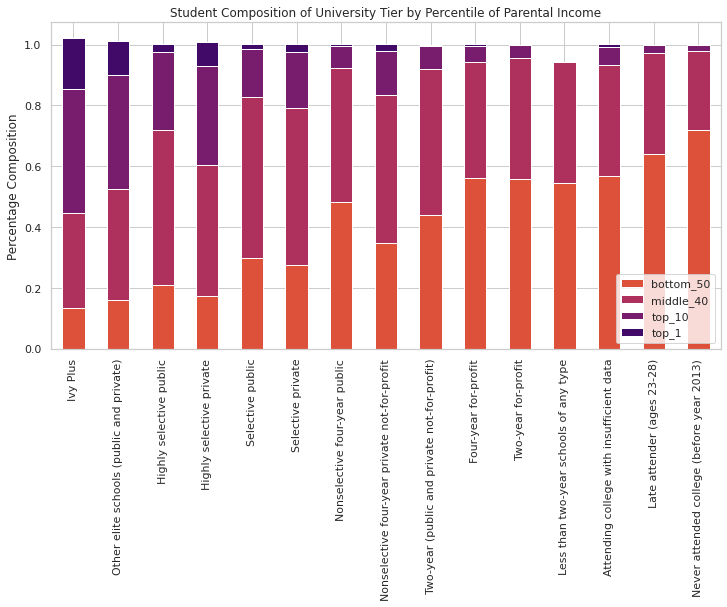

In [24]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 4))
x.plot.bar(stacked=True, figsize=(12,6), color = color,
           ylabel="Percentage Composition", title="Student Composition of University Tier by Percentile of Parental Income")

In [15]:
dataset[dataset["tier"]==i][dataset["k_rank"] < .50]["density"].to_numpy().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1.00013604772

In [16]:
z = []
for i in range(1,16):
  temp = []
  if i == 14: i = 14.1
  if i == 15: i = 14.2
  temp.append(dataset[dataset["tier"]==i][dataset["k_rank"] < .30]["density"].to_numpy().sum())
  temp.append(dataset[dataset["tier"]==i][dataset["k_rank"] >= .30][dataset["k_rank"] < .40]["density"].to_numpy().sum())
  temp.append(dataset[dataset["tier"]==i][dataset["k_rank"] >= .40][dataset["k_rank"] < .50]["density"].to_numpy().sum())
  temp.append(dataset[dataset["tier"]==i][dataset["k_rank"] >= .50][dataset["k_rank"] < .60]["density"].to_numpy().sum())
  temp.append(dataset[dataset["tier"]==i][dataset["k_rank"] >= .60][dataset["k_rank"] < .70]["density"].to_numpy().sum())
  temp.append(dataset[dataset["tier"]==i][dataset["k_rank"] >= .70][dataset["k_rank"] < .80]["density"].to_numpy().sum())
  temp.append(dataset[dataset["tier"]==i][dataset["k_rank"] >= .80]["density"].to_numpy().sum())
  z.append(temp)
z = pd.DataFrame(z, index = dataset.tier_name.unique(), columns = ["bottom_30", "30-40", "40-50", "50-60", "60-70", "70-80", "80+"])
z

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path(

bottom_30  ...       80+
Ivy Plus                                         0.00000  ...  0.105436
Other elite schools (public and private)         0.00000  ...  0.000000
Highly selective public                          0.00000  ...  0.000000
Highly selective private                         0.00000  ...  0.000000
Selective public                                 0.00000  ...  0.000000
Selective private                                0.00000  ...  0.000000
Nonselective four-year public                    0.00000  ...  0.000000
Nonselective four-year private not-for-profit    0.00000  ...  0.000000
Two-year (public and private not-for-profit)     0.00000  ...  0.000000
Four-year for-profit                             0.00000  ...  0.000000
Two-year for-profit                              0.00000  ...  0.000000
Less than two-year schools of any type           0.00000  ...  0.000000
Attending college with insufficient data         0.00000  ...  0.000000
Late attender (ages 23-28)                       0.00000  ...  0.000000
Never attended college (before year 2013)        0.13053  ...  0.000000

[15 rows x 7 columns]

In [26]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 7))
z.plot.bar(stacked=True, figsize=(12,6), color = color,
           ylabel="Percentage Composition", title="Post-Graduation Student Earnings Percentile by University Tier")